In [2]:
!unzip /content/data1.zip

Archive:  /content/data1.zip
   creating: data/
  inflating: __MACOSX/._data         
  inflating: data/houses_to_rent.csv  
  inflating: __MACOSX/data/._houses_to_rent.csv  
  inflating: data/Advertising.csv    
  inflating: __MACOSX/data/._Advertising.csv  
  inflating: data/breastcancer_test.csv  
  inflating: __MACOSX/data/._breastcancer_test.csv  
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/breastcancer_training.csv  
  inflating: __MACOSX/data/._breastcancer_training.csv  
  inflating: data/Vehicle.csv        
  inflating: __MACOSX/data/._Vehicle.csv  
  inflating: data/concrete_data.csv  
  inflating: __MACOSX/data/._concrete_data.csv  
  inflating: data/iris-with-errors.csv  
  inflating: __MACOSX/data/._iris-with-errors.csv  
  inflating: data/winequality-red.csv  
  inflating: __MACOSX/data/._winequality-red.csv  
  inflating: data/iris.csv           
  inflating: __MACOSX/data/._iris.csv  
  inflating: data/BreastCancer.cs

R² Linear Regression: 0.700
R² Lasso Regression: 0.674
R² Ridge Regression: 0.699


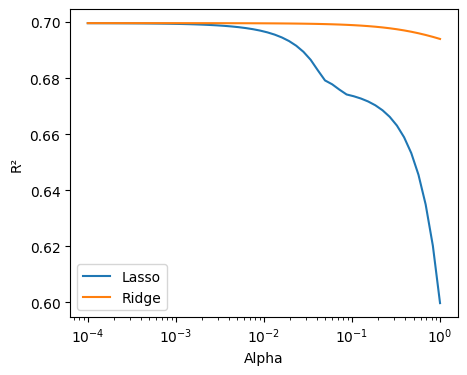

In [20]:
# Considere a base BostonHousing.
# Compare o coeficiente R2 obtido através de regressão linear múltipla, Lasso e ridge regression.
# Para os métodos Lasso e ridge regression, faça um gráfico de α x R² conforme feito no notebook da aula.

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('data/BostonHousing.csv')

X = data.drop(columns=['medv'])  # Variáveis independentes
y = data['medv']  # Variável dependente

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"R² Linear Regression: {r2_linear:.3f}")

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R² Lasso Regression: {r2_lasso:.3f}")

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² Ridge Regression: {r2_ridge:.3f}")

alphas = np.logspace(-4, 0, 50)  # Valores de alpha variando
r2_lasso_values = []
r2_ridge_values = []

for alpha in alphas:
    # Lasso
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    r2_lasso_values.append(lasso.score(X_test, y_test))

    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    r2_ridge_values.append(ridge.score(X_test, y_test))

# Plotar o gráfico
plt.figure(figsize=(5, 4))
plt.plot(alphas, r2_lasso_values, label='Lasso')
plt.plot(alphas, r2_ridge_values, label='Ridge')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R²')
plt.legend()
plt.show()

Coeficientes das variáveis no modelo Lasso:
rm         3.251217
rad        0.271009
zn         0.067130
b          0.013692
age        0.001821
chas       0.000000
nox       -0.000000
tax       -0.013784
indus     -0.067261
crim      -0.143692
lstat     -0.585676
ptratio   -0.649454
dis       -1.254849
dtype: float64
As variáveis com coeficientes maiores (em valor absoluto) são as mais influentes.


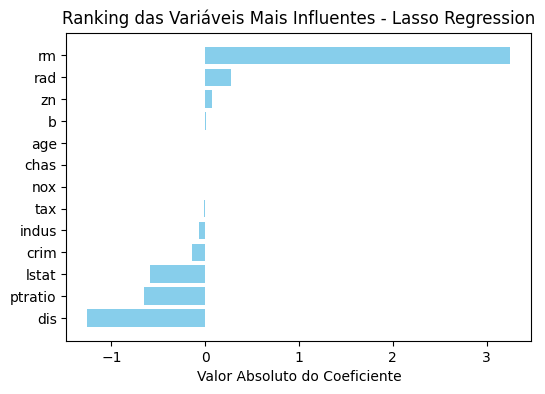

In [23]:
# Determine as variáveis que mais influenciam o preço de imóveis em Boston usando Lasso.

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_coef = pd.Series(lasso_model.coef_, index=X.columns)

# Ordenar os coeficientes e mostrar as variáveis mais influentes
print("Coeficientes das variáveis no modelo Lasso:")
print(lasso_coef.sort_values(ascending=False))
print("As variáveis com coeficientes maiores (em valor absoluto) são as mais influentes.")

# Plotar o gráfico de barras
plt.figure(figsize=(6, 4))
sorted_coef = lasso_coef.sort_values(ascending=False)
plt.barh(sorted_coef.index, sorted_coef.values, color='skyblue')
plt.xlabel('Valor Absoluto do Coeficiente')
plt.title('Ranking das Variáveis Mais Influentes - Lasso Regression')
plt.gca().invert_yaxis()  # Inverter o eixo y para exibir a variável mais influente no topo
plt.show()

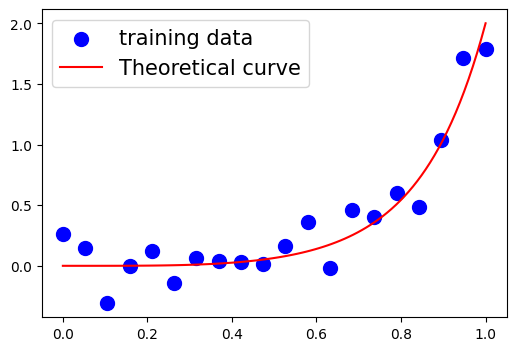

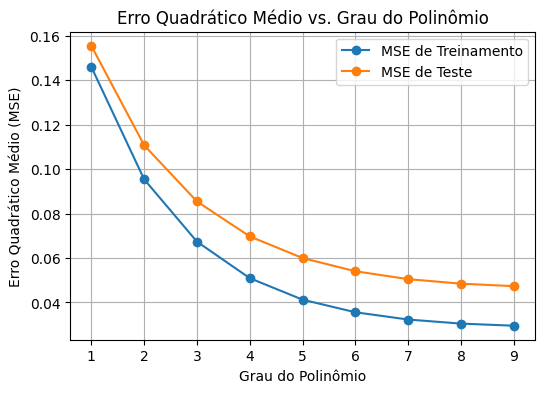

O grau do polinômio que minimiza o erro de teste é: 9


In [18]:
# Considere os dados gerados com o código a seguir. Usando regularização, ajuste o grau do polinômio que define o modelo mais adequado.

import numpy as np
from matplotlib import pyplot as plt

np.random.seed(10)

# função para gerar os dados
def function(x):
    y = x**4 + x**9
    return y

# training set
N_train = 20
sigma = 0.2
x_train = np.linspace(0, 1, N_train)
y_train = function(x_train) + np.random.normal(0, sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)

fig = plt.figure(figsize=(6, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, label="training data")

# test set
N_test = 20
x_test = np.linspace(0, 1, N_test)
y_test = function(x_test) + np.random.normal(0, sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

# Curva teórica
xt = np.linspace(0, 1, 100)
yt = function(xt)
plt.plot(xt, yt, 'r', label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Função para ajustar modelos e calcular MSE
def evaluate_polynomial_models(degrees, alpha):
    mse_train = []
    mse_test = []

    for d in degrees:
        # Transformação polinomial
        poly = PolynomialFeatures(degree=d)
        X_train_poly = poly.fit_transform(x_train)
        X_test_poly = poly.transform(x_test)

        # Ajuste do modelo com regularização L2
        model = Ridge(alpha=alpha)
        model.fit(X_train_poly, y_train)

        # Previsões e cálculo do erro
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        mse_train.append(mean_squared_error(y_train, y_train_pred))
        mse_test.append(mean_squared_error(y_test, y_test_pred))

    return mse_train, mse_test

# Parâmetros
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]
alpha = 1.0  # Parâmetro de regularização

# Avaliação dos modelos
mse_train, mse_test = evaluate_polynomial_models(degrees, alpha)

# Plotando os resultados
plt.figure(figsize=(6, 4))
plt.plot(degrees, mse_train, label='MSE de Treinamento', marker='o')
plt.plot(degrees, mse_test, label='MSE de Teste', marker='o')
plt.xlabel('Grau do Polinômio')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('Erro Quadrático Médio vs. Grau do Polinômio')
plt.legend()
plt.grid(True)
plt.show()

# Encontrar o melhor grau do polinômio
best_degree = degrees[np.argmin(mse_test)]
print(f'O grau do polinômio que minimiza o erro de teste é: {best_degree}')